# VirES - access to Swarm, CHAMP, and Cryosat-2 virtual observatories data

This notebook demonstrates access to Swarm, CHAMP and Cryosat-2 VOBS_1M and V_OBS_4M virtual observatory data via VirES for Swarm API.

Avalable collections

| Collection Name | Description |
|---|---|
| `SW_OPER_VOBS_1M_2_` | Swarm 1 month data from all virtual observatories |
| `SW_OPER_VOBS_1M_2_:<code>` | Swarm 1 month data from one selected virtual observatory |
| `SW_OPER_VOBS_4M_2_` | Swarm 4 month data from all virtual observatories |
| `SW_OPER_VOBS_4M_2_:<code>` | Swarm 4 months data from one selected virtual observatory |
| `CH_OPER_VOBS_1M_2_` | CHAMP 1 month data from all virtual observatories |
| `CH_OPER_VOBS_1M_2_:<code>` | CHAMP 1 month data from one selected virtual observatory |
| `CH_OPER_VOBS_4M_2_` | CHAMP 4 month data from all virtual observatories |
| `CH_OPER_VOBS_4M_2_:<code>` | CHAMP 4 months data from one selected virtual observatory |
| `CR_OPER_VOBS_4M_2_` | Cryosat-2 4 month data from all virtual observatories |
| `CR_OPER_VOBS_4M_2_:<code>` | Cryosat-2 4 months data from one selected virtual observatory |


The `<code>` is a 7-letter "virtual observatories" identifier, unique for each of the 300 "virtual observatories".

Avalable variables (same for all collections)                          

| Variable | Unit | Dimension | Description | 
|---|---|---|---|
| `SiteCode` | $-$ | char [7] | virtual observatory identifier |
| `Timestamp` | $-$ | scalar | UTC time of observation |
| `Latitude` | $\text{deg}$ | scalar | ITRF geocentric latitude |
| `Longitude` | $\text{deg}$ | scalar | ITRF geocentric longitude |
| `Radius` | $\text{m}$ | scalar | ITRF geocentric radius |
| `B_CF` | $\text{nT}$ | vector [3] | Core magnetic field vector in ITRF NEC frame. |
| `B_OB` | $\text{nT}$ | vector [3] | Observed magnetic field vector in ITRF NEC frame. |
| `sigma_CF` | $\text{nT}$ | vector [3] | Estimated error of the core magnetic field vector in ITRF NEC frame. |
| `sigma_OB` | $\text{nT}$ | vector [3] | Estimated error of the observed magnetic field vector in ITRF NEC frame. |

The secular variation variables `B_SV` and `sigma_SV` not available in the currently used demostration dataset.

In [1]:
# pre-release setup

! pip install --upgrade 'git+https://github.com/ESA-VirES/VirES-Python-Client@swarm_gvo#egg=viresclient'

VOBS_VARIABLES = [
    'SiteCode',
    'B_CF', 'B_OB', #'B_SV',
    'sigma_CF', 'sigma_OB', #'sigma_SV',
]

VOBS_SW_1M_COLLECTION = 'SW_OPER_VOBS_1M_2_'
VOBS_SW_4M_COLLECTION = 'SW_OPER_VOBS_4M_2_'
VOBS_CH_1M_COLLECTION = 'CH_OPER_VOBS_1M_2_'
VOBS_CH_4M_COLLECTION = 'CH_OPER_VOBS_4M_2_'
VOBS_CR_4M_COLLECTION = 'CR_OPER_VOBS_4M_2_'

VOBS_SITES = [
    'N90E000',
    'N77W026', 'N77W077', 'N77W129',
    'N77E026', 'N77E077', 'N77E129', 'N77E180',
    'N65W024', 'N65W051', 'N65W079', 'N65W107', 'N65W135', 'N65W162',
    'N65E004', 'N65E032', 'N65E059', 'N65E087', 'N65E115', 'N65E142', 'N65E170',
    'N54W003', 'N54W023', 'N54W043', 'N54W063', 'N54W083', 'N54W103', 'N54W123', 'N54W143', 'N54W163',
    'N54E017', 'N54E037', 'N54E057', 'N54E077', 'N54E097', 'N54E117', 'N54E137', 'N54E157', 'N54E177',
    'N42W007', 'N42W023', 'N42W038', 'N42W054', 'N42W069', 'N42W085', 'N42W101', 'N42W116', 'N42W132', 'N42W148', 'N42W163', 'N42W179',
    'N42E009', 'N42E024', 'N42E040', 'N42E056', 'N42E071', 'N42E087', 'N42E103', 'N42E118', 'N42E134', 'N42E150', 'N42E165',
    'N30W009', 'N30W022', 'N30W036', 'N30W049', 'N30W062', 'N30W076', 'N30W089', 'N30W102', 'N30W116', 'N30W129', 'N30W142', 'N30W156', 'N30W169',
    'N30E004', 'N30E018', 'N30E031', 'N30E044', 'N30E058', 'N30E071', 'N30E084', 'N30E098', 'N30E111', 'N30E124', 'N30E138', 'N30E151', 'N30E164', 'N30E178',
    'N18W010', 'N18W022', 'N18W034', 'N18W046', 'N18W058', 'N18W070', 'N18W082', 'N18W094', 'N18W106', 'N18W118', 'N18W130', 'N18W142', 'N18W154', 'N18W166', 'N18W178',
    'N18E002', 'N18E014', 'N18E026', 'N18E038', 'N18E050', 'N18E062', 'N18E074', 'N18E086', 'N18E098', 'N18E110', 'N18E122', 'N18E134', 'N18E146', 'N18E158', 'N18E170',
    'N06W010', 'N06W021', 'N06W033', 'N06W045', 'N06W056', 'N06W068', 'N06W079', 'N06W091', 'N06W103', 'N06W114', 'N06W126', 'N06W138', 'N06W149', 'N06W161', 'N06W172',
    'N06E002', 'N06E013', 'N06E025', 'N06E037', 'N06E048', 'N06E060', 'N06E072', 'N06E083', 'N06E095', 'N06E106', 'N06E118', 'N06E130', 'N06E141', 'N06E153', 'N06E164', 'N06E176',
    'S06W004', 'S06W016', 'S06W027', 'S06W039', 'S06W050', 'S06W062', 'S06W074', 'S06W085', 'S06W097', 'S06W108', 'S06W120', 'S06W132', 'S06W143', 'S06W155', 'S06W167', 'S06W178',
    'S06E008', 'S06E019', 'S06E031', 'S06E042', 'S06E054', 'S06E066', 'S06E077', 'S06E089', 'S06E101', 'S06E112', 'S06E124', 'S06E135', 'S06E147', 'S06E159', 'S06E170',
    'S18W003', 'S18W015', 'S18W027', 'S18W039', 'S18W051', 'S18W063', 'S18W075', 'S18W087', 'S18W099', 'S18W111', 'S18W123', 'S18W135', 'S18W147', 'S18W159', 'S18W171',
    'S18E009', 'S18E021', 'S18E033', 'S18E045', 'S18E057', 'S18E069', 'S18E081', 'S18E093', 'S18E105', 'S18E117', 'S18E129', 'S18E141', 'S18E153', 'S18E165', 'S18E177',
    'S30W001', 'S30W015', 'S30W028', 'S30W041', 'S30W055', 'S30W068', 'S30W081', 'S30W095', 'S30W108', 'S30W121', 'S30W135', 'S30W148', 'S30W161', 'S30W175',
    'S30E012', 'S30E025', 'S30E039', 'S30E052', 'S30E065', 'S30E079', 'S30E092', 'S30E105', 'S30E119', 'S30E132', 'S30E145', 'S30E159', 'S30E172',
    'S42W014', 'S42W030', 'S42W046', 'S42W061', 'S42W077', 'S42W093', 'S42W108', 'S42W124', 'S42W140', 'S42W155', 'S42W171',
    'S42E001', 'S42E017', 'S42E033', 'S42E048', 'S42E064', 'S42E079', 'S42E095', 'S42E111', 'S42E126', 'S42E142', 'S42E158', 'S42E173',
    'S54W014', 'S54W034', 'S54W054', 'S54W074', 'S54W094', 'S54W114', 'S54W134', 'S54W154', 'S54W174',
    'S54E006', 'S54E026', 'S54E046', 'S54E066', 'S54E086', 'S54E106', 'S54E126', 'S54E146', 'S54E166',
    'S65W041', 'S65W069', 'S65W096', 'S65W124', 'S65W152', 'S65W179',
    'S65E014', 'S65E042', 'S65E070', 'S65E098', 'S65E125', 'S65E153', 'S65W013',
    'S77W063', 'S77W114', 'S77W166',
    'S77E040', 'S77E092', 'S77E143', 'S77W011',
    'S90E000'
]

from viresclient import SwarmRequest

SwarmRequest.OBS_COLLECTIONS += [
    VOBS_SW_1M_COLLECTION,
    VOBS_SW_4M_COLLECTION,
    VOBS_CH_1M_COLLECTION,
    VOBS_CH_4M_COLLECTION,
    VOBS_CR_4M_COLLECTION,
]
    
SwarmRequest.PRODUCT_VARIABLES['VOBS_SW_1M'] = VOBS_VARIABLES
SwarmRequest.PRODUCT_VARIABLES['VOBS_SW_4M'] = VOBS_VARIABLES
SwarmRequest.PRODUCT_VARIABLES['VOBS_CH_1M'] = VOBS_VARIABLES
SwarmRequest.PRODUCT_VARIABLES['VOBS_CH_4M'] = VOBS_VARIABLES
SwarmRequest.PRODUCT_VARIABLES['VOBS_CR_4M'] = VOBS_VARIABLES

SwarmRequest.COLLECTIONS['VOBS_SW_1M'] = [VOBS_SW_1M_COLLECTION] + [f'{VOBS_SW_1M_COLLECTION}:{site}' for site in VOBS_SITES]
SwarmRequest.COLLECTIONS['VOBS_SW_4M'] = [VOBS_SW_4M_COLLECTION] + [f'{VOBS_SW_4M_COLLECTION}:{site}' for site in VOBS_SITES]
SwarmRequest.COLLECTIONS['VOBS_CH_1M'] = [VOBS_CH_1M_COLLECTION] + [f'{VOBS_CH_1M_COLLECTION}:{site}' for site in VOBS_SITES]
SwarmRequest.COLLECTIONS['VOBS_CH_4M'] = [VOBS_CH_4M_COLLECTION] + [f'{VOBS_CH_4M_COLLECTION}:{site}' for site in VOBS_SITES]
SwarmRequest.COLLECTIONS['VOBS_CR_4M'] = [VOBS_CR_4M_COLLECTION] + [f'{VOBS_CR_4M_COLLECTION}:{site}' for site in VOBS_SITES]

SwarmRequest.COLLECTION_SAMPLING_STEPS['VOBS_SW_1M'] = 'P31D'
SwarmRequest.COLLECTION_SAMPLING_STEPS['VOBS_CH_1M'] = 'P31D'
SwarmRequest.COLLECTION_SAMPLING_STEPS['VOBS_SW_4M'] = 'P122D'
SwarmRequest.COLLECTION_SAMPLING_STEPS['VOBS_CH_4M'] = 'P122D'
SwarmRequest.COLLECTION_SAMPLING_STEPS['VOBS_CR_4M'] = 'P122D'

  Cloning https://github.com/ESA-VirES/VirES-Python-Client (to revision swarm_gvo) to /tmp/pip-install-qgg6i1q2/viresclient
  Created wheel for viresclient: filename=viresclient-0.7.1-py3-none-any.whl size=67589 sha256=1a06966f734f22488e01643637a29c123d4ea35b1f62ddd1d0f2ef7b392513d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-_u3vpo0g/wheels/d3/d4/f3/ed4b44570cfc4c1529d54fcdf6c4fba7573c4becadc76e9c64
Successfully built viresclient
  Attempting uninstall: viresclient
    Found existing installation: viresclient 0.7.1
    Uninstalling viresclient-0.7.1:
      Successfully uninstalled viresclient-0.7.1
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
from matplotlib.pyplot import figure, subplot, show
from viresclient import SwarmRequest

#server_url = None # default VirES server
server_url = 'https://staging.viresdisc.vires.services/ows' # DISC server

request = SwarmRequest(server_url)

## Swarm, CHAMP, and Cryosat-2 - VOBS_1M and VOBS_4M - one virtual observatory

In [3]:
from datetime import datetime

site = 'S77W114'

collections = {
    'SW_1M': 'SW_OPER_VOBS_1M_2_',
    'SW_4M': 'SW_OPER_VOBS_4M_2_',
    'CH_1M': 'CH_OPER_VOBS_1M_2_',
    'CH_4M': 'CH_OPER_VOBS_4M_2_',
    'CR_4M': 'CR_OPER_VOBS_4M_2_',
}
data = {}

for source, collection in collections.items():
    request.set_collection(f'{collection}:{site}')
    request.set_products(measurements=VOBS_VARIABLES)
    data[source] = request.get_between(
        start_time='2000-01-01T10:00:00Z',
        end_time=datetime.now(),
        asynchronous=False,
    ).as_xarray()
    print(data[source])


      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)


<xarray.Dataset>
Dimensions:     (B_CF_dim1: 3, B_OB_dim1: 3, Timestamp: 82, sigma_CF_dim1: 3, sigma_OB_dim1: 3)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2013-12-15T12:00:00 ... 2020-09-15T12:00:00
Dimensions without coordinates: B_CF_dim1, B_OB_dim1, sigma_CF_dim1, sigma_OB_dim1
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    sigma_OB    (Timestamp, sigma_OB_dim1) float64 7.305 17.46 ... 16.41 18.69
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    sigma_CF    (Timestamp, sigma_CF_dim1) float64 nan nan nan ... 2.358 5.248
    B_CF        (Timestamp, B_CF_dim1) float64 nan nan ... -7.144e+03 1.115e+04
    B_OB        (Timestamp, B_OB_dim1) float64 4.068e+04 ... 1.115e+04
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.86

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)

<xarray.Dataset>
Dimensions:     (B_CF_dim1: 3, B_OB_dim1: 3, Timestamp: 21, sigma_CF_dim1: 3, sigma_OB_dim1: 3)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2014-03-01T12:00:00 ... 2020-11-01T12:00:00
Dimensions without coordinates: B_CF_dim1, B_OB_dim1, sigma_CF_dim1, sigma_OB_dim1
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    sigma_OB    (Timestamp, sigma_OB_dim1) float64 5.103 13.37 ... 17.0 20.13
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    sigma_CF    (Timestamp, sigma_CF_dim1) float64 9.204 3.435 ... 3.435 7.412
    B_CF        (Timestamp, B_CF_dim1) float64 4.064e+04 ... 1.114e+04
    B_OB        (Timestamp, B_OB_dim1) float64 4.066e+04 ... 1.114e+04
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
Attr


      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)


<xarray.Dataset>
Dimensions:     (B_CF_dim1: 3, B_OB_dim1: 3, Timestamp: 122, sigma_CF_dim1: 3, sigma_OB_dim1: 3)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2000-08-15T12:00:00 ... 2010-09-15T12:00:00
Dimensions without coordinates: B_CF_dim1, B_OB_dim1, sigma_CF_dim1, sigma_OB_dim1
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    sigma_OB    (Timestamp, sigma_OB_dim1) float64 18.98 27.69 ... 11.55 14.38
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    sigma_CF    (Timestamp, sigma_CF_dim1) float64 nan nan nan ... nan nan nan
    B_CF        (Timestamp, B_CF_dim1) float64 nan nan nan nan ... nan nan nan
    B_OB        (Timestamp, B_OB_dim1) float64 4.397e+04 -7.19e+03 ... 1.203e+04
    SiteCode    (Timestamp) <U7 'N18W094' 'N18W082' ... 'S30W081' 'S30W068'
    Radius      (Timestamp) float64 6.741e+06 6.741e+06 ... 6.74

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)


<xarray.Dataset>
Dimensions:     (B_CF_dim1: 3, B_OB_dim1: 3, Timestamp: 26, sigma_CF_dim1: 3, sigma_OB_dim1: 3)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2010-07-01T12:00:00 ... 2018-11-01T12:00:00
Dimensions without coordinates: B_CF_dim1, B_OB_dim1, sigma_CF_dim1, sigma_OB_dim1
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    sigma_OB    (Timestamp, sigma_OB_dim1) float64 5.27 9.533 ... 18.54 27.64
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    sigma_CF    (Timestamp, sigma_CF_dim1) float64 nan nan nan ... 5.667 11.27
    B_CF        (Timestamp, B_CF_dim1) float64 nan nan ... -6.458e+03 9.73e+03
    B_OB        (Timestamp, B_OB_dim1) float64 3.687e+04 ... 9.739e+03
    SiteCode    (Timestamp) <U7 'S18E177' 'S18W171' ... 'S30E119' 'S30E132'
    Radius      (Timestamp) float64 7.098e+06 7.098e+06 ... 7.098e+06 7.098e

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


''

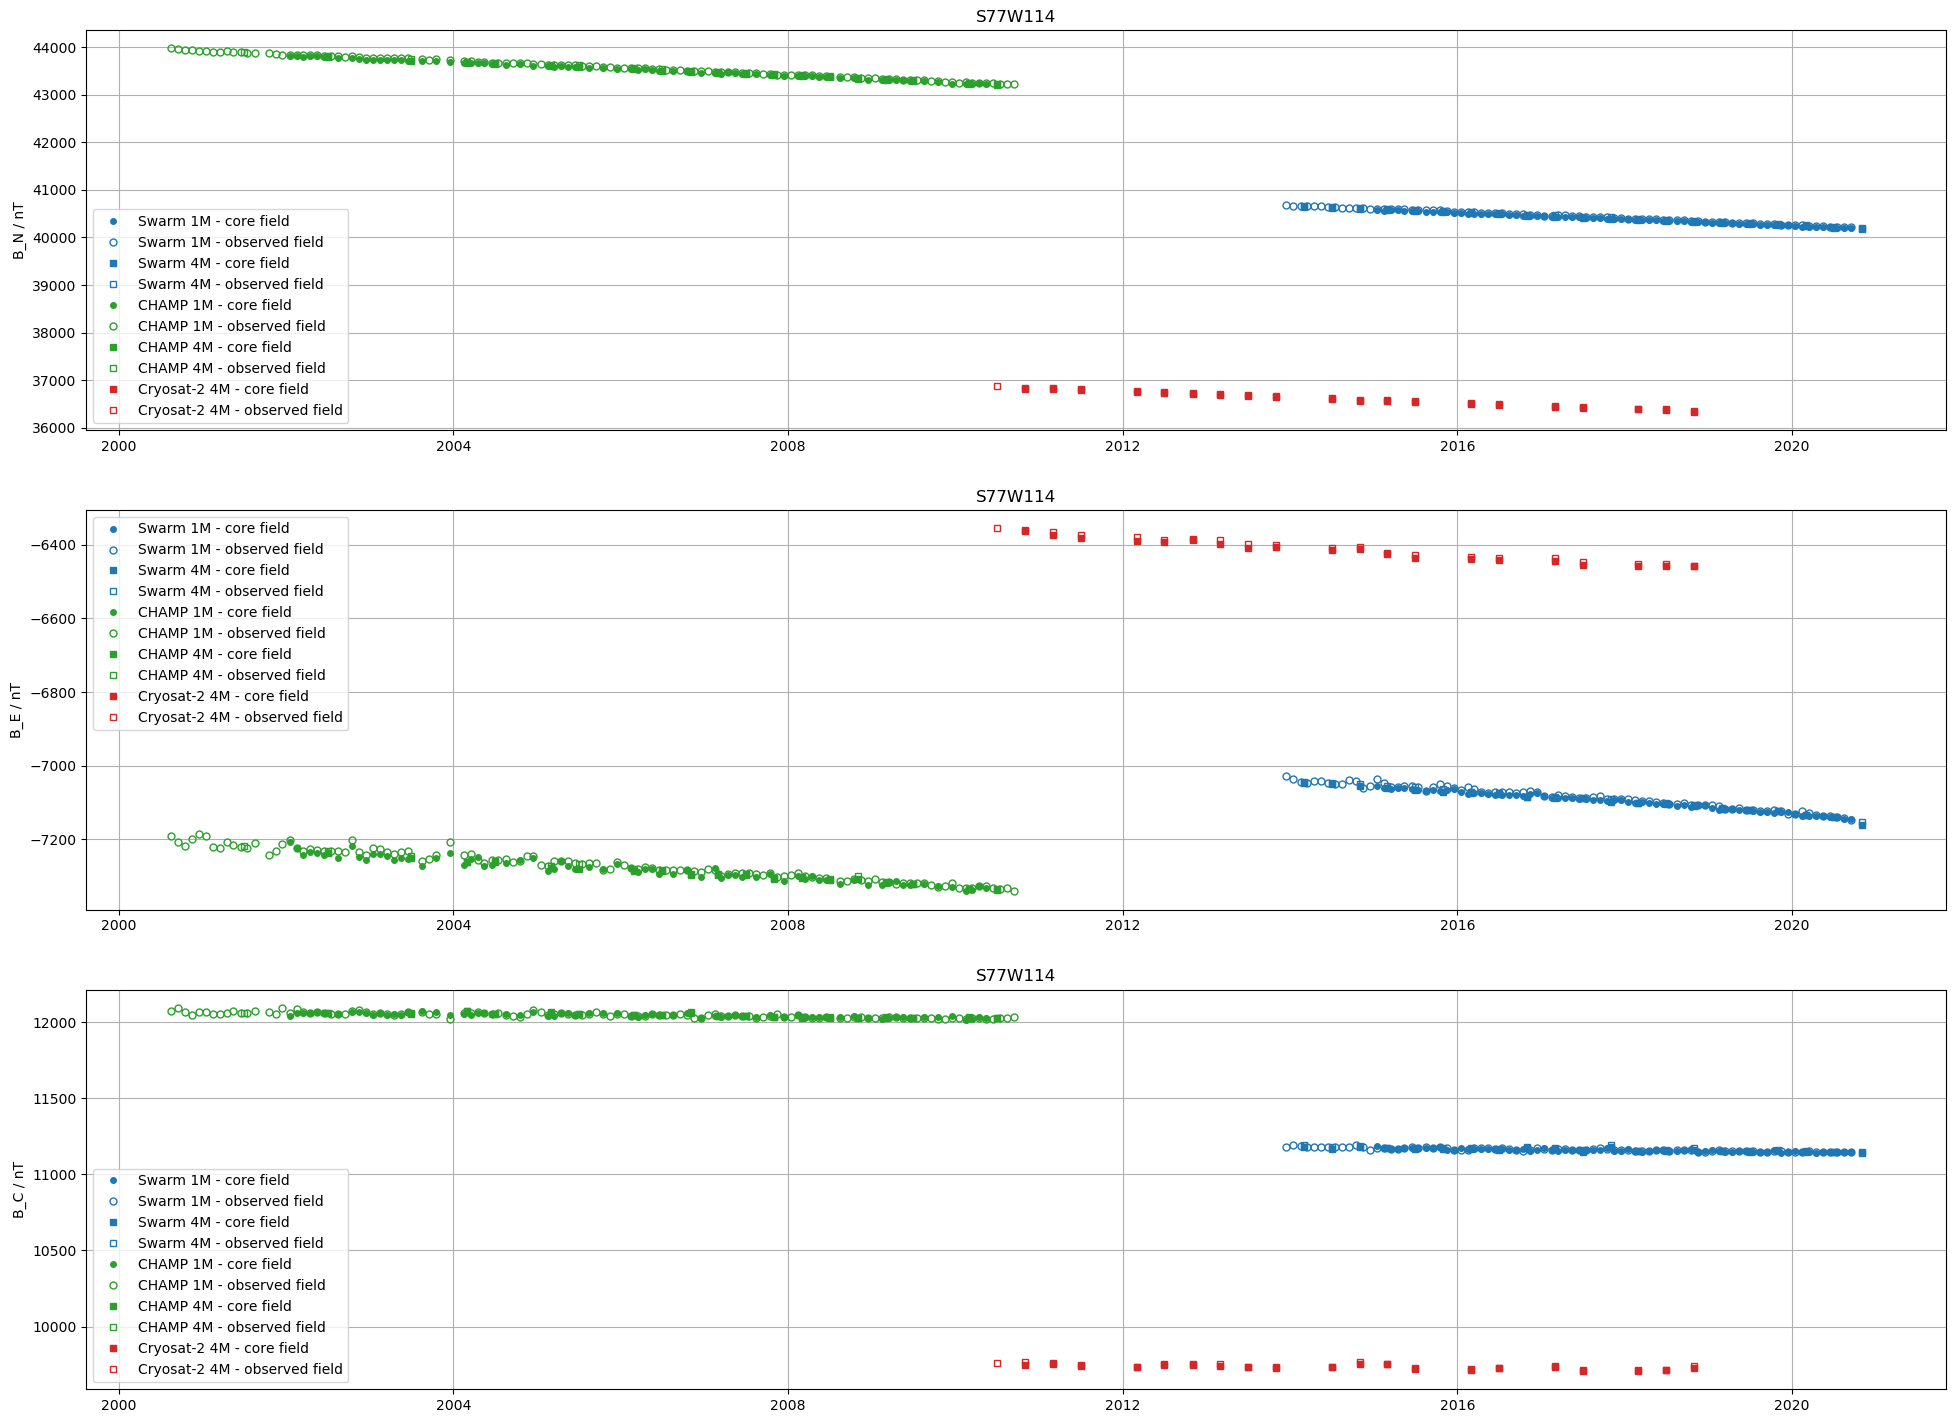

In [4]:
%matplotlib inline
fig = figure(figsize=(24, 18), dpi=100)

meta = {
    'SW_1M': {'mission': 'Swarm', 'sampling': '1M', 'symbol': 'o', 'color': 'tab:blue'},
    'SW_4M': {'mission': 'Swarm', 'sampling': '4M', 'symbol': 's', 'color': 'tab:blue'},
    'CH_1M': {'mission': 'CHAMP', 'sampling': '1M', 'symbol': 'o', 'color': 'tab:green'},
    'CH_4M': {'mission': 'CHAMP', 'sampling': '4M', 'symbol': 's', 'color': 'tab:green'},
    'CR_4M': {'mission': 'Cryosat-2', 'sampling': '4M', 'symbol': 's', 'color': 'tab:red'},
}

ax = subplot(3, 1, 1)
idx = 0
plots, labels = [], []
for type_, data_ in data.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_CF'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_OB'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=5, mfc='none')[0])
    labels.extend([
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - core field',
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - observed field'
    ])
ax.set_title(site)
ax.set_ylabel('B_N / nT')
ax.grid()
ax.legend(plots, labels)

ax = subplot(3, 1, 2)
idx = 1
plots, labels = [], []
for type_, data_ in data.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_CF'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_OB'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=5, mfc='none')[0])
    labels.extend([
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - core field',
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - observed field'
    ])
ax.set_title(site)
ax.set_ylabel('B_E / nT')
ax.grid()
ax.legend(plots, labels)

ax = subplot(3, 1, 3)
idx = 2
plots, labels = [], []
for type_, data_ in data.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_CF'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_OB'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=5, mfc='none')[0])
    labels.extend([
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - core field',
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - observed field'
    ])
ax.set_title(site)
ax.set_ylabel('B_C / nT')
ax.grid()
ax.legend(plots, labels)
;